In [1]:
!pip install boto3

# !pip install s3fs

In [2]:
!pip install sklearn


In [3]:
import boto3

In [4]:
!pip install pandas
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
client = boto3.client('s3')

In [ ]:
path2 = 's3://handm1/customers.csv' 
path3 = 's3://handm1/transactions_train.csv'

In [6]:
customers = pd.read_csv('customers.csv')
transaction = pd.read_csv('transactions_train.csv')

In [123]:
customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1371980 entries, 0 to 1371979
Data columns (total 7 columns):
 #   Column                  Non-Null Count    Dtype  
---  ------                  --------------    -----  
 0   customer_id             1371980 non-null  object 
 1   FN                      476930 non-null   float64
 2   Active                  464404 non-null   float64
 3   club_member_status      1365918 non-null  object 
 4   fashion_news_frequency  1355971 non-null  object 
 5   age                     1356119 non-null  float64
 6   postal_code             1371980 non-null  object 
dtypes: float64(3), object(4)
memory usage: 73.3+ MB


customers.columns

In [10]:
customers.columns

Index(['customer_id', 'FN', 'Active', 'club_member_status',
       'fashion_news_frequency', 'age', 'postal_code'],
      dtype='object')

In [11]:
transaction.head()

,t_dat,customer_id,article_id,price,sales_channel_id
0,2018-09-20,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,663713001,0.050831,2
1,2018-09-20,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,541518023,0.030492,2
2,2018-09-20,00007d2de826758b65a93dd24ce629ed66842531df6699...,505221004,0.015237,2
3,2018-09-20,00007d2de826758b65a93dd24ce629ed66842531df6699...,685687003,0.016932,2
4,2018-09-20,00007d2de826758b65a93dd24ce629ed66842531df6699...,685687004,0.016932,2


In [12]:
transaction.columns

Index(['t_dat', 'customer_id', 'article_id', 'price', 'sales_channel_id'], dtype='object')

##Left Join for transaction and customer tables

In [13]:
result = pd.merge(transaction,customers,how="left", on=["customer_id","customer_id"])

In [14]:
result.head()

,t_dat,customer_id,article_id,price,sales_channel_id,FN,Active,club_member_status,fashion_news_frequency,age,postal_code
0,2018-09-20,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,663713001,0.050831,2,NaN,NaN,ACTIVE,NONE,24.0,64f17e6a330a85798e4998f62d0930d14db8db1c054af6...
1,2018-09-20,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,541518023,0.030492,2,NaN,NaN,ACTIVE,NONE,24.0,64f17e6a330a85798e4998f62d0930d14db8db1c054af6...
2,2018-09-20,00007d2de826758b65a93dd24ce629ed66842531df6699...,505221004,0.015237,2,1.0,1.0,ACTIVE,Regularly,32.0,8d6f45050876d059c830a0fe63f1a4c022de279bb68ce3...
3,2018-09-20,00007d2de826758b65a93dd24ce629ed66842531df6699...,685687003,0.016932,2,1.0,1.0,ACTIVE,Regularly,32.0,8d6f45050876d059c830a0fe63f1a4c022de279bb68ce3...
4,2018-09-20,00007d2de826758b65a93dd24ce629ed66842531df6699...,685687004,0.016932,2,1.0,1.0,ACTIVE,Regularly,32.0,8d6f45050876d059c830a0fe63f1a4c022de279bb68ce3...


In [15]:
result.columns

Index(['t_dat', 'customer_id', 'article_id', 'price', 'sales_channel_id', 'FN',
       'Active', 'club_member_status', 'fashion_news_frequency', 'age',
       'postal_code'],
      dtype='object')

In [16]:
## Removing Unnecessary features
# Here article_id is removed because our goal is to findout if the person is going to buy a product in 90 days 
# or not. Article id is not needed for it.

In [17]:
result = result.drop(['article_id'],axis=1)

# Data Preprocessing
- Missing Values
- Cardinality
- Minumum value
- Maximum value
- DataTypes
- Handling Missing Value
- Handling DataType
- Outliers

## Missing Values

In [18]:
result.isna().sum()

t_dat                            0
customer_id                      0
price                            0
sales_channel_id                 0
FN                        18209837
Active                    18412468
club_member_status           62165
fashion_news_frequency      141711
age                         140258
postal_code                      0
dtype: int64

In [19]:
missing_values = pd.DataFrame(result.isna().sum(),columns=['Missing_Values'])

In [20]:
result.isna().sum() * 100/len(result)

t_dat                      0.000000
customer_id                0.000000
price                      0.000000
sales_channel_id           0.000000
FN                        57.284672
Active                    57.922110
club_member_status         0.195559
fashion_news_frequency     0.445796
age                        0.441225
postal_code                0.000000
dtype: float64

In [21]:
# Cardinality
# Here we have 2 years data which is approx of 734.
# Customer_id, article_id, price, and age unique values looks reasonable.  
#Sales_channel_id, club_members, and fashnion news frequency are also having reable unique values

In [22]:
result.nunique()

t_dat                         734
customer_id               1362281
price                        9857
sales_channel_id                2
FN                              1
Active                          1
club_member_status              3
fashion_news_frequency          4
age                            84
postal_code                352336
dtype: int64

In [23]:
Cardinality = pd.DataFrame(result.nunique(),columns=['Cardinality'])

In [24]:
#Count

In [25]:
result.count()

t_dat                     31788324
customer_id               31788324
price                     31788324
sales_channel_id          31788324
FN                        13578487
Active                    13375856
club_member_status        31726159
fashion_news_frequency    31646613
age                       31648066
postal_code               31788324
dtype: int64

In [26]:
count = pd.DataFrame(result.count(),columns=['count'])

In [27]:
# Maximum and minimum values

In [57]:
result.describe()

,price,sales_channel_id,age
count,3.178832e+07,3.178832e+07,3.178832e+07
mean,2.782927e-02,1.704028e+00,3.601604e+01
std,1.918113e-02,4.564786e-01,1.295566e+01
min,1.694915e-05,1.000000e+00,1.600000e+01
25%,1.581356e-02,1.000000e+00,2.500000e+01
50%,2.540678e-02,2.000000e+00,3.100000e+01
75%,3.388136e-02,2.000000e+00,4.700000e+01
max,5.915254e-01,2.000000e+00,9.900000e+01


In [58]:
# Data types

In [59]:
result.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 31788324 entries, 0 to 31788323
Data columns (total 8 columns):
 #   Column                  Dtype         
---  ------                  -----         
 0   t_dat                   datetime64[ns]
 1   customer_id             object        
 2   price                   float64       
 3   sales_channel_id        int64         
 4   club_member_status      object        
 5   fashion_news_frequency  object        
 6   age                     float64       
 7   postal_code             object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 2.1+ GB


In [60]:
data_types = pd.DataFrame(result.dtypes,columns=['Data_Types'])

In [61]:
#Mode

In [62]:
mode = pd.DataFrame(result[['sales_channel_id','club_member_status','fashion_news_frequency']].value_counts().idxmax(),columns=['Mode'])

In [63]:
mode

,Mode
0,2
1,ACTIVE
2,NONE


In [64]:
#Data quality report

In [65]:
data_quality_reportt = data_types.join(missing_values).join(Cardinality).join(count)
data_quality_reportt

,Data_Types,Missing_Values,Cardinality,count
t_dat,datetime64[ns],0,734,31788324
customer_id,object,0,1362281,31788324
price,float64,0,9857,31788324
sales_channel_id,int64,0,2,31788324
club_member_status,object,62165,3,31726159
fashion_news_frequency,object,141711,4,31646613
age,float64,140258,84,31648066
postal_code,object,0,352336,31788324


In [66]:
#Data Quality Plan

In [67]:
data_Quality_Plan = pd.DataFrame({'Feature':['Missing','Missing','Missing','DataType'],'Data Quality Issue':['More than 67% missing','23% Missing values','23% numerical missing values','Data type for date is object'],'Potential Handling Strategies':['remove because the missing vali=ues are more than 50%','Impute it with None','Impute it with Median','Convert the data type to time_date']})

In [68]:
data_Quality_Plan

,Feature,Data Quality Issue,Potential Handling Strategies
0,Missing,More than 67% missing,remove because the missing vali=ues are more t...
1,Missing,23% Missing values,Impute it with None
2,Missing,23% numerical missing values,Impute it with Median
3,DataType,Data type for date is object,Convert the data type to time_date


In [69]:
# Handling Missing Values

In [70]:
# Here both FN and Active are having more than 60%, so removing the columns is the best option.

#Clubmember status and fashion news frequency are filled with None. (their missing values are less than 50%)

In [71]:
result = result.drop(['FN','Active'],axis=1)

KeyError: "['FN' 'Active'] not found in axis"

In [ ]:
result.fillna({"club_member_status":'No','fashion_news_frequency':'None'},inplace=True)

In [ ]:
result.isna().sum()

In [ ]:
#Age has 23% of missing value, so we are imputing the missing value with median.

In [ ]:
result = result.fillna({'age': result['age'].median()})

In [ ]:
#Handling Datatypes

In [ ]:
# Handling Data Types
# t_dat is representing date column, but the datatype is object.
# So, converted into datetime datatype 

In [72]:
result['t_dat'] = pd.to_datetime(result['t_dat'],format='%Y-%m-%d')

In [73]:
result.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 31788324 entries, 0 to 31788323
Data columns (total 8 columns):
 #   Column                  Dtype         
---  ------                  -----         
 0   t_dat                   datetime64[ns]
 1   customer_id             object        
 2   price                   float64       
 3   sales_channel_id        int64         
 4   club_member_status      object        
 5   fashion_news_frequency  object        
 6   age                     float64       
 7   postal_code             object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 2.1+ GB


In [74]:
## Outliers (Incomplete)

In [75]:
Q1 = result.quantile(0.25)
Q3 = result.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

price                0.018068
sales_channel_id     1.000000
age                 22.000000
dtype: float64


<AxesSubplot:xlabel='age'>

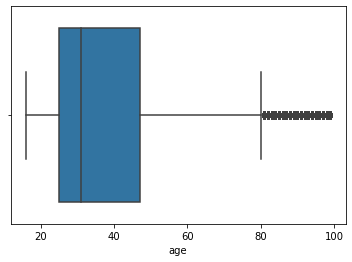

In [76]:
sns.boxplot(x=result['age'])

Label encoder

The customer ids are in the form of alphanumeric values. Coverting it in numerical form for easilt understanding

In [77]:
from sklearn.preprocessing import LabelEncoder
x = LabelEncoder()
result['customer_id'] = x.fit_transform(result['customer_id'])

In [78]:
result

,t_dat,customer_id,price,sales_channel_id,club_member_status,fashion_news_frequency,age,postal_code
0,2018-09-20,2,0.050831,2,ACTIVE,NONE,24.0,64f17e6a330a85798e4998f62d0930d14db8db1c054af6...
1,2018-09-20,2,0.030492,2,ACTIVE,NONE,24.0,64f17e6a330a85798e4998f62d0930d14db8db1c054af6...
2,2018-09-20,7,0.015237,2,ACTIVE,Regularly,32.0,8d6f45050876d059c830a0fe63f1a4c022de279bb68ce3...
3,2018-09-20,7,0.016932,2,ACTIVE,Regularly,32.0,8d6f45050876d059c830a0fe63f1a4c022de279bb68ce3...
4,2018-09-20,7,0.016932,2,ACTIVE,Regularly,32.0,8d6f45050876d059c830a0fe63f1a4c022de279bb68ce3...
...,...,...,...,...,...,...,...,...
31788319,2020-09-22,1361995,0.059305,2,ACTIVE,Regularly,32.0,2695d7727a61ed8011f93de47dc9445017596302bd0592...
31788320,2020-09-22,1361995,0.042356,2,ACTIVE,Regularly,32.0,2695d7727a61ed8011f93de47dc9445017596302bd0592...
31788321,2020-09-22,1362025,0.043203,1,ACTIVE,NONE,67.0,a9c9c4db44316f6e62ea17ba5e8b84c1ec3ebeddb3f299...
31788322,2020-09-22,1362050,0.006763,1,ACTIVE,Regularly,21.0,3737324e2574c3bde9ef00336bc767781dbed7e828d51a...


In [79]:
#We have 1362281 unique customers as shown below

In [80]:
len(result['customer_id'].unique())

1362281

In [81]:
#first purchase of each unique customer

In [82]:
first_purchase = result.sort_values(['t_dat']).groupby('customer_id').first()

In [83]:
first_purchase

,t_dat,price,sales_channel_id,club_member_status,fashion_news_frequency,age,postal_code
customer_id,,,,,,,
0,2018-12-27,0.044051,1,ACTIVE,NONE,49.0,52043ee2162cf5aa7ee79974281641c6f11a68d276429a...
1,2018-09-21,0.067780,2,ACTIVE,NONE,25.0,2973abc54daa8a5f8ccfe9362140c63247c5eee03f1d93...
2,2018-09-20,0.050831,2,ACTIVE,NONE,24.0,64f17e6a330a85798e4998f62d0930d14db8db1c054af6...
3,2019-06-09,0.030492,2,ACTIVE,NONE,54.0,5d36574f52495e81f019b680c843c443bd343d5ca5b1c2...
4,2018-10-12,0.027102,1,ACTIVE,Regularly,52.0,25fa5ddee9aac01b35208d01736e57942317d756b32ddd...
...,...,...,...,...,...,...,...
1362276,2019-04-03,0.050831,2,ACTIVE,NONE,24.0,7aa399f7e669990daba2d92c577b52237380662f36480b...
1362277,2018-09-25,0.064390,1,ACTIVE,NONE,21.0,3f47f1279beb72215f4de557d950e0bfa73789d24acb5e...
1362278,2018-09-20,0.042356,1,ACTIVE,Regularly,21.0,4563fc79215672cd6a863f2b4bf56b8f898f2d96ed590e...


In [84]:
first_purchase['t_dat'].min()

Timestamp('2018-09-20 00:00:00')

In [85]:
first_purchase['t_dat'].max()

Timestamp('2020-09-22 00:00:00')

In [86]:
#Splitting the time based on before and after

In [87]:
dayss = 90
max_date_total = result['t_dat'].max()
cutoff = max_date_total - pd.to_timedelta(dayss,unit='d')

In [88]:
print(cutoff)
print(max_date_total)

2020-06-24 00:00:00
2020-09-22 00:00:00


In [89]:
data_before = result[result["t_dat"]<=cutoff]

In [90]:
data_after = result[result["t_dat"]>cutoff]

In [91]:
#Descriptive
data_before

,t_dat,customer_id,price,sales_channel_id,club_member_status,fashion_news_frequency,age,postal_code
0,2018-09-20,2,0.050831,2,ACTIVE,NONE,24.0,64f17e6a330a85798e4998f62d0930d14db8db1c054af6...
1,2018-09-20,2,0.030492,2,ACTIVE,NONE,24.0,64f17e6a330a85798e4998f62d0930d14db8db1c054af6...
2,2018-09-20,7,0.015237,2,ACTIVE,Regularly,32.0,8d6f45050876d059c830a0fe63f1a4c022de279bb68ce3...
3,2018-09-20,7,0.016932,2,ACTIVE,Regularly,32.0,8d6f45050876d059c830a0fe63f1a4c022de279bb68ce3...
4,2018-09-20,7,0.016932,2,ACTIVE,Regularly,32.0,8d6f45050876d059c830a0fe63f1a4c022de279bb68ce3...
...,...,...,...,...,...,...,...,...
27982718,2020-06-24,1362251,0.024390,2,ACTIVE,Regularly,55.0,6cffe743cea040fddb93a098579cf73fd7a137a913850a...
27982719,2020-06-24,1362251,0.017610,2,ACTIVE,Regularly,55.0,6cffe743cea040fddb93a098579cf73fd7a137a913850a...
27982720,2020-06-24,1362251,0.013542,2,ACTIVE,Regularly,55.0,6cffe743cea040fddb93a098579cf73fd7a137a913850a...
27982721,2020-06-24,1362251,0.010831,2,ACTIVE,Regularly,55.0,6cffe743cea040fddb93a098579cf73fd7a137a913850a...


In [92]:
#Target
data_after

,t_dat,customer_id,price,sales_channel_id,club_member_status,fashion_news_frequency,age,postal_code
27982723,2020-06-25,38,0.025407,1,ACTIVE,Regularly,44.0,930b19ae7db8abb5a27f4da10217755a7305b4c452f5e0...
27982724,2020-06-25,38,0.015237,1,ACTIVE,Regularly,44.0,930b19ae7db8abb5a27f4da10217755a7305b4c452f5e0...
27982725,2020-06-25,38,0.042356,1,ACTIVE,Regularly,44.0,930b19ae7db8abb5a27f4da10217755a7305b4c452f5e0...
27982726,2020-06-25,38,0.030492,1,ACTIVE,Regularly,44.0,930b19ae7db8abb5a27f4da10217755a7305b4c452f5e0...
27982727,2020-06-25,38,0.025407,1,ACTIVE,Regularly,44.0,930b19ae7db8abb5a27f4da10217755a7305b4c452f5e0...
...,...,...,...,...,...,...,...,...
31788319,2020-09-22,1361995,0.059305,2,ACTIVE,Regularly,32.0,2695d7727a61ed8011f93de47dc9445017596302bd0592...
31788320,2020-09-22,1361995,0.042356,2,ACTIVE,Regularly,32.0,2695d7727a61ed8011f93de47dc9445017596302bd0592...
31788321,2020-09-22,1362025,0.043203,1,ACTIVE,NONE,67.0,a9c9c4db44316f6e62ea17ba5e8b84c1ec3ebeddb3f299...
31788322,2020-09-22,1362050,0.006763,1,ACTIVE,Regularly,21.0,3737324e2574c3bde9ef00336bc767781dbed7e828d51a...


In [93]:
#Making target values

In [94]:
target_df = data_after[['customer_id','price']].groupby('customer_id').sum().rename({'price':'spent_90days'},axis=1).assign(Flag_90days=1)

In [95]:
#(0 nnot found)
target_df

,spent_90days,Flag_90days
customer_id,,
0,0.050831,1
1,0.027102,1
2,0.061000,1
4,0.128746,1
6,0.076237,1
...,...,...
1362264,0.323559,1
1362270,0.066051,1
1362276,0.293017,1


In [96]:
#We need Last days of purchase, first day of purchase, total sales, Number of purchases

In [97]:
#Recency
##How many days have passed since the last purchase

In [98]:
max_date_in = data_before['t_dat'].max()

In [99]:
recency_features_df = data_before[['customer_id','t_dat']].groupby('customer_id').apply(lambda x: (x['t_dat'].max() - max_date_in) / pd.to_timedelta(1,"day")).to_frame().set_axis(["recency"], axis=1)

In [100]:
recency_features_df

,recency
customer_id,
0,-95.0
1,-63.0
2,-67.0
3,-381.0
4,-21.0
...,...
1362276,-4.0
1362277,-44.0
1362278,-154.0


In [101]:
#Frequency
# Number of Orders

In [102]:
frequency_features_df = data_before[['customer_id','t_dat']].groupby('customer_id').count().set_axis(['frequency'], axis=1)

In [103]:
frequency_features_df

,frequency
customer_id,
0,20
1,85
2,17
3,2
4,9
...,...
1362276,39
1362277,76
1362278,35


In [104]:
#Monertary

In [105]:
price_features_df = data_before.groupby('customer_id').aggregate({"price":["sum","mean"]}).set_axis(['Monertary','price_mean'], axis=1)

In [106]:
price_features_df

,Monertary,price_mean
customer_id,,
0,0.598153,0.029908
1,2.574831,0.030292
2,0.643780,0.037869
3,0.060983,0.030492
4,0.340949,0.037883
...,...,...
1362276,0.999339,0.025624
1362277,1.702373,0.022400
1362278,0.646729,0.018478


In [107]:
#Concatnating all the columns, RFM and target values

In [108]:
features_df = pd.concat([recency_features_df, frequency_features_df, price_features_df], axis = 1).merge(target_df,left_index=True,right_index=True,how = "left").fillna(0)

In [109]:
features_df

,recency,frequency,Monertary,price_mean,spent_90days,Flag_90days
customer_id,,,,,,
0,-95.0,20,0.598153,0.029908,0.050831,1.0
1,-63.0,85,2.574831,0.030292,0.027102,1.0
2,-67.0,17,0.643780,0.037869,0.061000,1.0
3,-381.0,2,0.060983,0.030492,0.000000,0.0
4,-21.0,9,0.340949,0.037883,0.128746,1.0
...,...,...,...,...,...,...
1362276,-4.0,39,0.999339,0.025624,0.293017,1.0
1362277,-44.0,76,1.702373,0.022400,0.104949,1.0
1362278,-154.0,35,0.646729,0.018478,0.142203,1.0


In [110]:
z = data_before.groupby('customer_id').max(['age','sales_channel_id','club_member_status','fashion_news_frequency'])
z.head(10)

,price,sales_channel_id,age
customer_id,,,
0,0.054220,2,49.0
1,0.084729,2,25.0
2,0.067780,2,24.0
3,0.030492,2,54.0
4,0.059305,2,52.0
5,0.042356,2,31.0
6,0.025407,2,20.0
7,0.218644,2,32.0
8,0.030492,1,20.0


In [111]:
features_final = pd.merge(features_df,z,how="left", on=["customer_id","customer_id"])

In [112]:
features_final

,,recency,frequency,Monertary,price_mean,spent_90days,Flag_90days,price,sales_channel_id,age
customer_id,customer_id,,,,,,,,,
0,0,-95.0,20,0.598153,0.029908,0.050831,1.0,0.054220,2,49.0
1,1,-63.0,85,2.574831,0.030292,0.027102,1.0,0.084729,2,25.0
2,2,-67.0,17,0.643780,0.037869,0.061000,1.0,0.067780,2,24.0
3,3,-381.0,2,0.060983,0.030492,0.000000,0.0,0.030492,2,54.0
4,4,-21.0,9,0.340949,0.037883,0.128746,1.0,0.059305,2,52.0
...,...,...,...,...,...,...,...,...,...,...
1362276,1362276,-4.0,39,0.999339,0.025624,0.293017,1.0,0.067780,2,24.0
1362277,1362277,-44.0,76,1.702373,0.022400,0.104949,1.0,0.076254,2,21.0
1362278,1362278,-154.0,35,0.646729,0.018478,0.142203,1.0,0.042356,2,21.0


In [113]:
#Correlation

<AxesSubplot:>

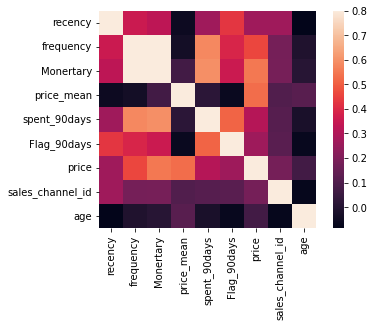

In [115]:
r = features_final.corr()
sns.heatmap(r,vmax=.8,square=True)

In [116]:
#Histograms

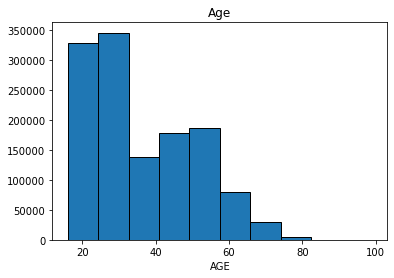

In [117]:
plt.hist(features_final['age'],bins=10,edgecolor='black')
plt.xlabel('AGE')
plt.title('Age')
plt.show()

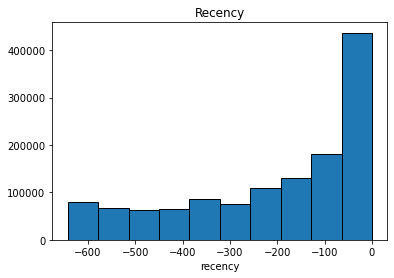

In [118]:
plt.hist(features_final['recency'],bins=10,edgecolor='black')
plt.xlabel('recency')
plt.title('Recency')
plt.show()

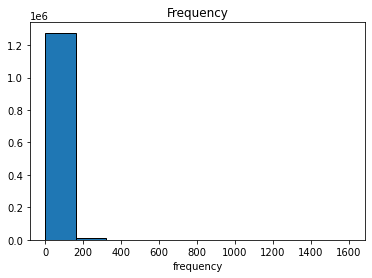

In [119]:
plt.hist(features_final['frequency'],bins=10,edgecolor='black')
plt.xlabel('frequency')
plt.title('Frequency')
plt.show()

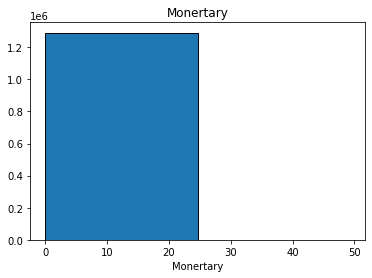

In [126]:
plt.hist(features_final['Monertary'],bins=2,edgecolor='black')
plt.xlabel('Monertary')
plt.title('Monertary')
plt.show()

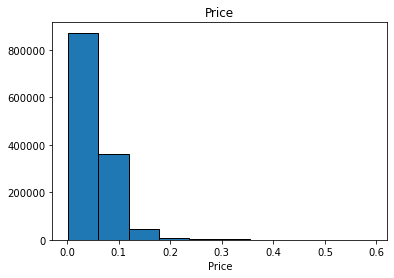

In [121]:
plt.hist(features_final['price'],bins=10,edgecolor='black')
plt.xlabel('Price')
plt.title('Price')
plt.show()

In [ ]:
#Normalization

In [ ]:
#Abt
#Norm
          #Age
          #correlatio
          #art
        #mode sales 
       #age sepearate
          #article ID, FN, Active remove
#yes and nO using Active(based on lastest)
          #Data quality value
         #Sales channel mode